# Exploratory Notebook

In [29]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import zipfile
import pickle

In [30]:
# import the csv file
budgDF = pd.read_csv('tn.movie_budgets.csv.gz')

In [31]:
# view details of data frame
budgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [32]:
# check averages of the numeric values
budgDF.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [33]:
# view the display header of the data frame
budgDF.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [34]:
budgDF['release_date'].value_counts()

Dec 31, 2014    24
Dec 31, 2015    23
Dec 31, 2010    15
Dec 31, 2008    14
Dec 31, 2012    13
                ..
Apr 2, 1968      1
May 26, 1993     1
Jul 7, 2004      1
Dec 22, 1978     1
Nov 20, 1996     1
Name: release_date, Length: 2418, dtype: int64

In [35]:
budgDF['production_budget'].value_counts()

$20,000,000     231
$10,000,000     212
$30,000,000     177
$15,000,000     173
$25,000,000     171
               ... 
$4,638,783        1
$15,700,000       1
$17,900,000       1
$103,300,000      1
$9,700,000        1
Name: production_budget, Length: 509, dtype: int64

In [36]:
budgDF['domestic_gross'].value_counts()

$0              548
$8,000,000        9
$7,000,000        7
$2,000,000        7
$10,000,000       6
               ... 
$12,234,694       1
$153,636,354      1
$228,524          1
$18,600,152       1
$33,302,167       1
Name: domestic_gross, Length: 5164, dtype: int64

In [41]:
# Use the pd.to_datetime() method to convert the object column to datetime format
budgDF['release_date'] = pd.to_datetime(budgDF['release_date'], errors='coerce')

In [42]:
# Create a new column for the year
budgDF['year'] = budgDF['release_date'].dt.year

In [43]:
# Create a new column for the month
budgDF['month'] = budgDF['release_date'].dt.month_name()

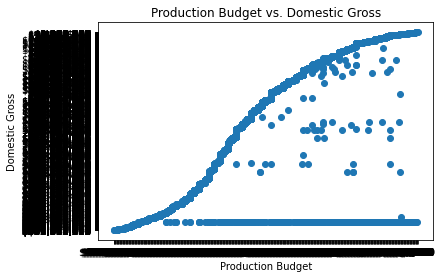

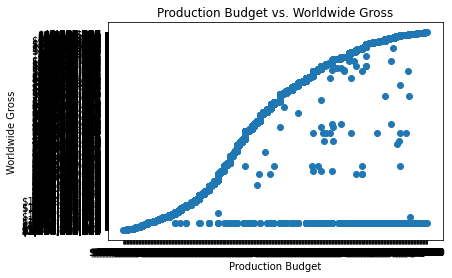

In [45]:
# Create a scatter plot of production_budget vs. domestic_gross
plt.scatter(budgDF['production_budget'], budgDF['domestic_gross'])
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.title('Production Budget vs. Domestic Gross')
plt.show()

# Create a scatter plot of production_budget vs. worldwide_gross
plt.scatter(budgDF['production_budget'], budgDF['worldwide_gross'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs. Worldwide Gross')
plt.show()


In [46]:
budgDF.to_csv('budgDF.csv')

In [47]:
#imported csv file 
movie_dataDF = pd.read_csv('movie_dataset.csv')

In [48]:
#view data frame of the csv file
movie_dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [49]:
#View summary statistics of the data frame
movie_dataDF.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [50]:
#View the display of the first rows of the data frame
movie_dataDF.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [51]:
# Drop unnecessary columns
# Columns to drop
drop_columns = ['homepage', 'id', 'keywords', 'original_title', 'overview', 'spoken_languages', 'status',
                'tagline', 'crew', 'production_countries', 'vote_count', 'vote_average', 'director', 'cast', 'popularity']
# Drop columns in the specified list
movie_dataDF = movie_dataDF.drop(columns=drop_columns)

In [52]:
#Verify revised set of rows
movie_dataDF.head(2)

,index,budget,genres,original_language,production_companies,release_date,revenue,runtime,title
0,0,237000000,Action Adventure Fantasy Science Fiction,en,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar
1,1,300000000,Adventure Fantasy Action,en,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End


In [53]:
#Remove all language except for english
movie_dataDF = movie_dataDF[movie_dataDF['original_language'] == 'en']

In [54]:
#Verify amount of values remaining for english language
movie_dataDF.value_counts('original_language')

original_language
en    4505
dtype: int64

In [55]:
# Use the pd.to_datetime() method to convert the object column to datetime format
movie_dataDF['release_date'] = pd.to_datetime(movie_dataDF['release_date'], errors='coerce')

In [56]:
# Create a mask to filter out dates before 2008-12-31
mask = movie_dataDF['release_date'].dt.year < 2008

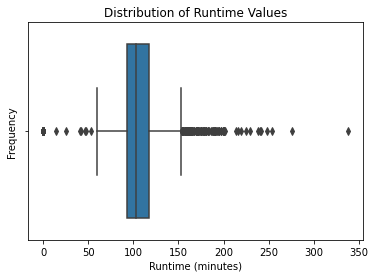

In [57]:
# View outliers
# Create a boxplot to visualize the distribution of runtime values
sns.boxplot(x=movie_dataDF['runtime'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Runtime Values')
plt.show()

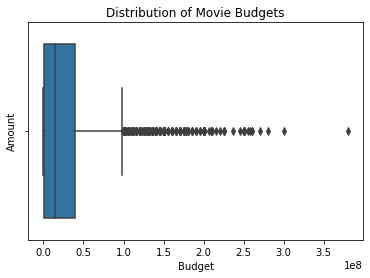

In [58]:
# View outliers
# Create a boxplot of the budget column
sns.boxplot(data=movie_dataDF, x="budget")

# Add a title and labels to the plot
plt.title("Distribution of Movie Budgets")
plt.xlabel("Budget")
plt.ylabel("Amount")

# Show the plot
plt.show()

In [59]:
#creating a dictionary called  that has three keys: , , and . The  key stores the names of the columns in the DataFrame  that have a dtype of . The  key stores the number of unique values in each of those columns. The  key stores the list of unique values for each of those columns.

#The code then uses the function to convert the dictionary into a Pandas DataFrame. This DataFrame can be used to explore the unique values in the DataFrame .
new_genres = []
for genre in list(set(movie_dataDF["genres"].unique())):
    for genre_word in str(genre).split(" "):
        new_genres.append(genre_word)
genres = list(set(new_genres))
genres.remove("Fiction")
genres[-6] = "Science Fiction"
genres.remove("nan")
print("Genres:", ", ".join(genres))

Genres: Crime, Horror, Mystery, Thriller, Music, Drama, Movie, War, Animation, TV, History, Comedy, Romance, Fantasy, Adventure, Science Fiction, Foreign, Family, Action, Science, Documentary


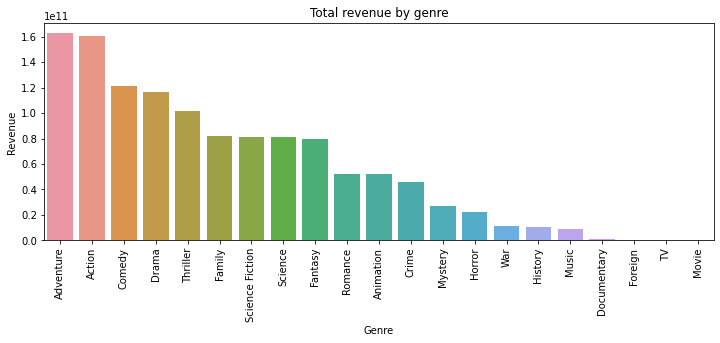

In [60]:
#Create new group and plot out reveneue by genre
dict_revenues = {"Genre": [], "Revenue": []}
for genre in genres:
    dict_revenues["Genre"].append(genre)
    dict_revenues["Revenue"].append(movie_dataDF[movie_dataDF["genres"].str.contains(genre, na=False)]["revenue"].sum())
df_revenues = pd.DataFrame(dict_revenues)
df_revenues.sort_values(by=["Revenue"], ascending=False, inplace=True)

#Plot bar graph
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
ax.set_title("Total revenue by genre")
sns.barplot(df_revenues, x="Genre", y="Revenue", ax=ax)
ax.tick_params(axis="x", rotation=90);

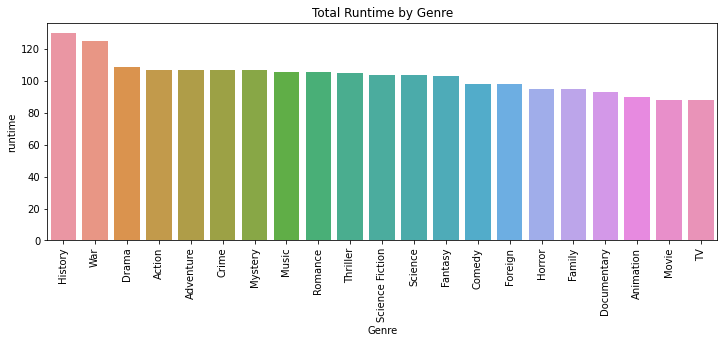

In [61]:
#Create a group to plot runtime by genre
genre_runtime = {"Genre": [], "runtime": []}
for genre in genres:
    genre_runtime["Genre"].append(genre)
    genre_runtime["runtime"].append(movie_dataDF[movie_dataDF["genres"].str.contains(genre, na=False)]["runtime"].median())
df_runtime = pd.DataFrame(genre_runtime)
df_runtime.sort_values(by=["runtime"], ascending=False, inplace=True)

#Plot bar graph
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
ax.set_title("Total Runtime by Genre")
sns.barplot(df_runtime, x="Genre", y="runtime", ax=ax)
ax.tick_params(axis="x", rotation=90);

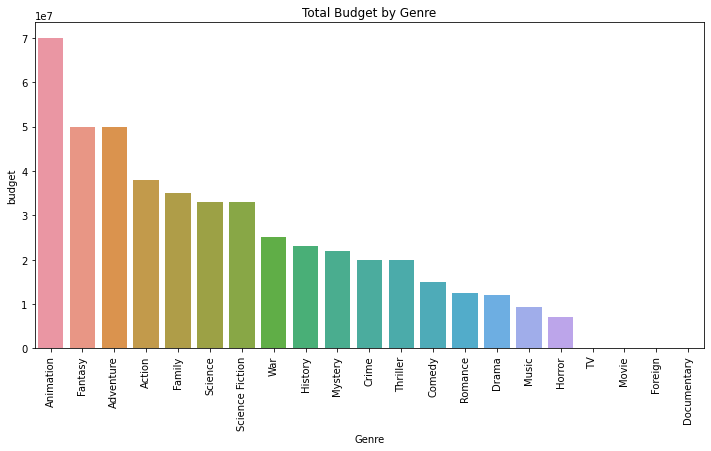

In [62]:
#Create a group to plot budget by genre
genre_runtime = {"Genre": [], "budget": []}
for genre in genres:
    genre_runtime["Genre"].append(genre)
    genre_runtime["budget"].append(movie_dataDF[movie_dataDF["genres"].str.contains(genre, na=False)]["budget"].median())
df_runtime = pd.DataFrame(genre_runtime)
df_runtime.sort_values(by=["budget"], ascending=False, inplace=True)

#Plot bar graph
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.set_title("Total Budget by Genre")
sns.barplot(df_runtime, x="Genre", y="budget", ax=ax)
ax.tick_params(axis="x", rotation=90);

In [63]:
movie_dataDF["budget_revenue_ratio"] = movie_dataDF["revenue"]/movie_dataDF["budget"]
movie_dataDF.sort_values(by=["budget_revenue_ratio"], ascending=False, inplace=True)

In [64]:
movie_dataDF.to_csv('movie_dataDF.csv')

In [65]:
#Imported the Box Office Mojo CSV
bomDF = pd.read_csv("bom.movie_gross.csv.gz")

bomDF

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [66]:
bomDF.info()
#We can stick to domestic since foriegn is missing so much

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [67]:
#Dropped Foreign Gross: not necessary and missing alot
bomDF = bomDF.drop(['foreign_gross'], axis = 1)

#Dropped any duplicate rows. (Turned out not to be any)
bomDF = bomDF.drop_duplicates()

#Dropped the few rows missing values (about 28) from domestic and studio 
bomDF = bomDF.dropna(subset=['domestic_gross', 'studio'])

#Dropped any special characters from the studios column to help combine and sort studio names.
bomDF['studio'] =  bomDF['studio'].str.replace('[^a-zA-Z0-9]', '')

bomDF

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,PDW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [68]:
#Calculated the Z-score for 'domestic_gross'
bomDF['z_score'] = (bomDF['domestic_gross'] - bomDF['domestic_gross'].mean()) / bomDF['domestic_gross'].std()

#Defined a std threshold for identifying outliers (it's usually 2 or 3)
threshold = 2 

#Identified the outliers and filtered their row's index label into outliers
outliers = bomDF[abs(bomDF['z_score']) > threshold].index

#Removed the outliers from Box Office Mojo Data Frame
cleanedBomDF = bomDF.drop(outliers)

cleanedBomDF

,title,studio,domestic_gross,year,z_score
11,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,2010,1.128667
12,The King's Speech,Wein,135500000.0,2010,1.592798
15,Prince of Persia: The Sands of Time,BV,90800000.0,2010,0.925703
16,Black Swan,FoxS,107000000.0,2010,1.167469
17,Megamind,PDW,148400000.0,2010,1.785315
...,...,...,...,...,...
3382,The Quake,Magn,6200.0,2018,-0.429288
3383,Edward II (2018 re-release),FM,4800.0,2018,-0.429309
3384,El Pacto,Sony,2500.0,2018,-0.429343
3385,The Swan,Synergetic,2400.0,2018,-0.429345


In [69]:
cleanedBomDF.describe()

,domestic_gross,year,z_score
count,3.209000e+03,3209.000000,3209.000000
mean,1.734494e+07,2013.957308,-0.170528
std,3.141535e+07,2.473371,0.468837
min,1.000000e+02,2010.000000,-0.429379
25%,1.080000e+05,2012.000000,-0.427769
50%,1.100000e+06,2014.000000,-0.412965
75%,2.080000e+07,2016.000000,-0.118965
max,1.624000e+08,2018.000000,1.994249


In [70]:
cleanedBomDF.to_csv('CleanBoxOfficeMojo', index = False)